<a href="https://colab.research.google.com/github/SantoshRokaya/Transfer-Learning-for-Medical-Image-Classification/blob/main/Deep_Minds_Group_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer Learning for Medical Image Classification
Instructed  by Haotian Liu (haotian.liu@oulu.fi)

Motivation: In medical imaging, obtaining large, labeled datasets is often challenging due to privacy concerns, high annotation costs, and limited availability of expert knowledge. To effectively learn and boost performance on these smaller datasets, we leverage transfer learning techniques, which consist of models that are trained on huge amounts of data.

Goal: Improve the performance of diabetic retinopathy detection using transfer learning by fine-tuning models and understanding the classification results with visualizations and explainable AI.

Requirements:

     1. Complete the project and submit the code. For the code, you can get help from github. (45 points)
     
          The DeepDRiD dataset, template code, and online evaluation are available on Kaggle: https://www.kaggle.com/t/41e0944a6839469fadd529fabab45e06. You should only use this dataset for final project purposes.
          You are required to complete a few tasks as follows. Please check the instruction document below for more information.

          a) Fine-tune a pre-trained model using the DeepDRiD dataset. (5 points)

          b) Two-stage training with additional datasets. (5 points)

          c) Incorporate attention mechanisms in the model. (10 points)

          d) Compare the performance of different models and strategies. (20 points)

          e) Creating Visualizations and Explainable AI. (5 points)

     2. Submit a report for this project. (15 points)

          The report should include a description of the methods used in the project, experimental results, and discussions.

# Task A: Fine-tune a pre-trained model using the DeepDRiD dataset. (5 points)

In [1]:
from google.colab import files
files.upload()  # This will prompt you to upload your kaggle.json file

# Move the API key to the correct location
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/root/.kaggle"

# Create the Kaggle directory and copy the API key there
!mkdir -p /root/.kaggle
!cp kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json  # Secure the key file

# Download DeepDRiD dataset
!kaggle competitions download -c 521153S-3005-final-project

# Unzip the downloaded dataset
!unzip 521153S-3005-final-project.zip

# List the contents of the current directory to verify
import os
os.listdir()



Saving kaggle.json to kaggle.json
 97% 385M/396M [00:02<00:00, 200MB/s]
100% 396M/396M [00:02<00:00, 199MB/s]
Archive:  521153S-3005-final-project.zip
  inflating: 521153S-3005-final-project/DeepDRiD/sample_submission.csv  
  inflating: 521153S-3005-final-project/DeepDRiD/test.csv  
  inflating: 521153S-3005-final-project/DeepDRiD/test/347/347_l1.jpg  
  inflating: 521153S-3005-final-project/DeepDRiD/test/347/347_l2.jpg  
  inflating: 521153S-3005-final-project/DeepDRiD/test/347/347_r1.jpg  
  inflating: 521153S-3005-final-project/DeepDRiD/test/347/347_r2.jpg  
  inflating: 521153S-3005-final-project/DeepDRiD/test/353/353_l1.jpg  
  inflating: 521153S-3005-final-project/DeepDRiD/test/353/353_l2.jpg  
  inflating: 521153S-3005-final-project/DeepDRiD/test/353/353_r1.jpg  
  inflating: 521153S-3005-final-project/DeepDRiD/test/353/353_r2.jpg  
  inflating: 521153S-3005-final-project/DeepDRiD/test/354/354_l1.jpg  
  inflating: 521153S-3005-final-project/DeepDRiD/test/354/354_l2.jpg  
  infl

['.config',
 'kaggle.json',
 'release',
 '521153S-3005-final-project',
 '521153S-3005-final-project.zip',
 'sample_data']

Train Columns: Index(['patient_id', 'image_id', 'img_path', 'Overall quality',
       'left_eye_DR_Level', 'right_eye_DR_Level', 'patient_DR_Level',
       'Clarity', 'Field definition', 'Artifact'],
      dtype='object')
Val Columns: Index(['patient_id', 'image_id', 'img_path', 'Overall quality',
       'left_eye_DR_Level', 'right_eye_DR_Level', 'patient_DR_Level',
       'Clarity', 'Field definition', 'Artifact'],
      dtype='object')
Test Columns: Index(['image_id', 'img_path'], dtype='object')

Class distribution in Train Dataset:
patient_id
330    4
1      4
2      4
3      4
4      4
      ..
16     4
17     4
18     4
19     4
20     4
Name: count, Length: 300, dtype: int64

Class distribution in Val Dataset:
patient_id
433    4
265    4
267    4
277    4
400    4
      ..
300    4
301    4
303    4
304    4
305    4
Name: count, Length: 100, dtype: int64

Class distribution in Test Dataset:
image_id
500_r2    1
347_l1    1
347_l2    1
347_r1    1
347_r2    1
         ..
368_r2

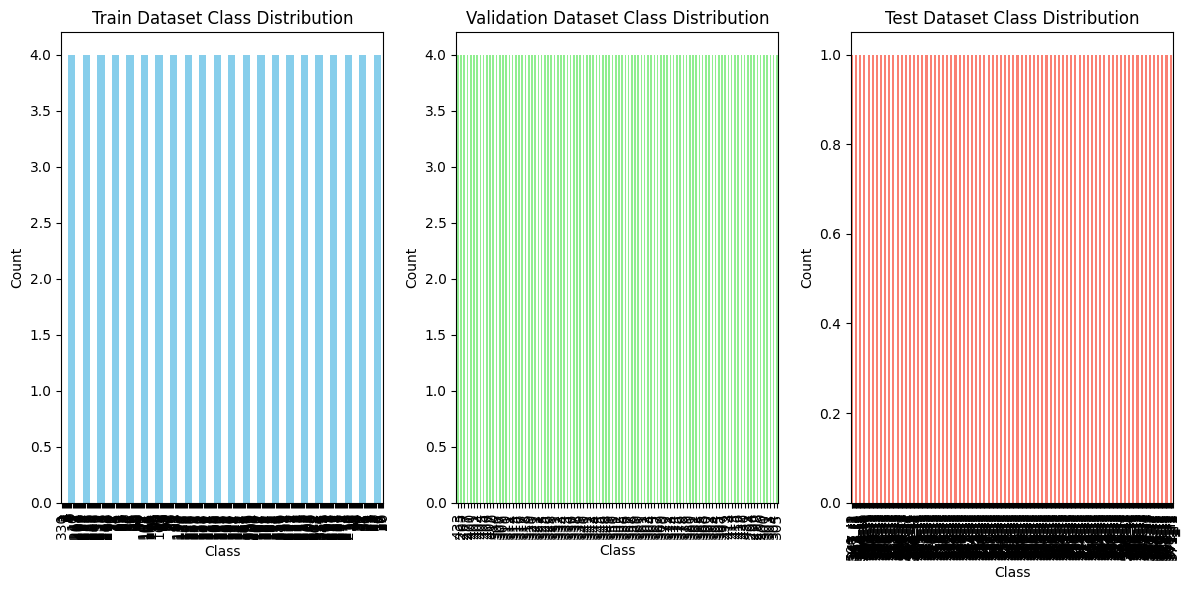

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the datasets
train_df = pd.read_csv('/content/521153S-3005-final-project/DeepDRiD/train.csv')
val_df = pd.read_csv('/content/521153S-3005-final-project/DeepDRiD/val.csv')
test_df = pd.read_csv('/content/521153S-3005-final-project/DeepDRiD/test.csv')

# Print the columns for reference
print("Train Columns:", train_df.columns)
print("Val Columns:", val_df.columns)
print("Test Columns:", test_df.columns)

# Analyze class distribution in each dataset
print("\nClass distribution in Train Dataset:")
train_class_counts = train_df['patient_id'].value_counts()
print(train_class_counts)

print("\nClass distribution in Val Dataset:")
val_class_counts = val_df['patient_id'].value_counts()
print(val_class_counts)

# Assuming 'patient_id' is also used in test.csv
print("\nClass distribution in Test Dataset:")
test_class_counts = test_df['image_id'].value_counts()
print(test_class_counts)

# Visualizing the class distribution
plt.figure(figsize=(12, 6))

# Plotting for Train dataset
plt.subplot(1, 3, 1)
train_class_counts.plot(kind='bar', color='skyblue')
plt.title('Train Dataset Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

# Plotting for Val dataset
plt.subplot(1, 3, 2)
val_class_counts.plot(kind='bar', color='lightgreen')
plt.title('Validation Dataset Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

# Plotting for Test dataset
plt.subplot(1, 3, 3)
test_class_counts.plot(kind='bar', color='salmon')
plt.title('Test Dataset Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Checking if there is an imbalance
def check_imbalance(class_counts, threshold=0.8):
    # Total samples and max class count
    total_samples = class_counts.sum()
    max_class_count = class_counts.max()

    # Imbalance ratio between the most frequent class and total samples
    imbalance_ratio = max_class_count / total_samples

    print(f"Imbalance ratio: {imbalance_ratio * 100:.2f}%")

    if imbalance_ratio > threshold:
        print(f"WARNING: Imbalance detected! The most frequent class accounts for {imbalance_ratio * 100:.2f}% of the dataset.")
    else:
        print("The dataset does not appear to be highly imbalanced.")

# Check imbalance in each dataset
print("\nChecking for imbalance in Train Dataset:")
check_imbalance(train_class_counts)

print("\nChecking for imbalance in Val Dataset:")
check_imbalance(val_class_counts)

print("\nChecking for imbalance in Test Dataset:")
check_imbalance(test_class_counts)


In [3]:
import copy
import os
import random
import sys

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from PIL import Image
from sklearn.metrics import cohen_kappa_score, precision_score, recall_score, accuracy_score
from torch.utils.data import Dataset, DataLoader
from torchvision import models, transforms
from tqdm import tqdm

# Hyper Parameters
batch_size = 24
num_classes = 5  # 5 DR levels
learning_rate = 0.0001
num_epochs = 20


class RetinopathyDataset(Dataset):
    def __init__(self, ann_file, image_dir, transform=None, mode='single', test=False):
        self.ann_file = ann_file
        self.image_dir = image_dir
        self.transform = transform

        self.test = test
        self.mode = mode

        if self.mode == 'single':
            self.data = self.load_data()
        else:
            self.data = self.load_data_dual()

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        if self.mode == 'single':
            return self.get_item(index)
        else:
            return self.get_item_dual(index)

    # 1. single image
    def load_data(self):
        df = pd.read_csv(self.ann_file)

        data = []
        for _, row in df.iterrows():
            file_info = dict()
            file_info['img_path'] = os.path.join(self.image_dir, row['img_path'])
            if not self.test:
                file_info['dr_level'] = int(row['patient_DR_Level'])
            data.append(file_info)
        return data

    def get_item(self, index):
        data = self.data[index]
        img = Image.open(data['img_path']).convert('RGB')
        if self.transform:
            img = self.transform(img)

        if not self.test:
            label = torch.tensor(data['dr_level'], dtype=torch.int64)
            return img, label
        else:
            return img

    # 2. dual image
    def load_data_dual(self):
        df = pd.read_csv(self.ann_file)

        df['prefix'] = df['image_id'].str.split('_').str[0]  # The patient id of each image
        df['suffix'] = df['image_id'].str.split('_').str[1].str[0]  # The left or right eye
        grouped = df.groupby(['prefix', 'suffix'])

        data = []
        for (prefix, suffix), group in grouped:
            file_info = dict()
            file_info['img_path1'] = os.path.join(self.image_dir, group.iloc[0]['img_path'])
            file_info['img_path2'] = os.path.join(self.image_dir, group.iloc[1]['img_path'])
            if not self.test:
                file_info['dr_level'] = int(group.iloc[0]['patient_DR_Level'])
            data.append(file_info)
        return data

    def get_item_dual(self, index):
        data = self.data[index]
        img1 = Image.open(data['img_path1']).convert('RGB')
        img2 = Image.open(data['img_path2']).convert('RGB')

        if self.transform:
            img1 = self.transform(img1)
            img2 = self.transform(img2)

        if not self.test:
            label = torch.tensor(data['dr_level'], dtype=torch.int64)
            return [img1, img2], label
        else:
            return [img1, img2]


class CutOut(object):
    def __init__(self, mask_size, p=0.5):
        self.mask_size = mask_size
        self.p = p

    def __call__(self, img):
        if np.random.rand() > self.p:
            return img

        # Ensure the image is a tensor
        if not isinstance(img, torch.Tensor):
            raise TypeError('Input image must be a torch.Tensor')

        # Get height and width of the image
        h, w = img.shape[1], img.shape[2]
        mask_size_half = self.mask_size // 2
        offset = 1 if self.mask_size % 2 == 0 else 0

        cx = np.random.randint(mask_size_half, w + offset - mask_size_half)
        cy = np.random.randint(mask_size_half, h + offset - mask_size_half)

        xmin, xmax = cx - mask_size_half, cx + mask_size_half + offset
        ymin, ymax = cy - mask_size_half, cy + mask_size_half + offset
        xmin, xmax = max(0, xmin), min(w, xmax)
        ymin, ymax = max(0, ymin), min(h, ymax)

        img[:, ymin:ymax, xmin:xmax] = 0
        return img


class SLORandomPad:
    def __init__(self, size):
        self.size = size

    def __call__(self, img):
        pad_width = max(0, self.size[0] - img.width)
        pad_height = max(0, self.size[1] - img.height)
        pad_left = random.randint(0, pad_width)
        pad_top = random.randint(0, pad_height)
        pad_right = pad_width - pad_left
        pad_bottom = pad_height - pad_top
        return transforms.functional.pad(img, (pad_left, pad_top, pad_right, pad_bottom))


class FundRandomRotate:
    def __init__(self, prob, degree):
        self.prob = prob
        self.degree = degree

    def __call__(self, img):
        if random.random() < self.prob:
            angle = random.uniform(-self.degree, self.degree)
            return transforms.functional.rotate(img, angle)
        return img


transform_train = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomCrop((210, 210)),
    SLORandomPad((224, 224)),
    FundRandomRotate(prob=0.5, degree=30),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.ColorJitter(brightness=(0.1, 0.9)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

transform_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


def train_model(model, train_loader, val_loader, device, criterion, optimizer, lr_scheduler, num_epochs=25,
                checkpoint_path='model.pth'):
    best_model = model.state_dict()
    best_epoch = None
    best_val_kappa = -1.0  # Initialize the best kappa score

    for epoch in range(1, num_epochs + 1):
        print(f'\nEpoch {epoch}/{num_epochs}')
        running_loss = []
        all_preds = []
        all_labels = []

        model.train()

        with tqdm(total=len(train_loader), desc=f'Training', unit=' batch', file=sys.stdout) as pbar:
            for images, labels in train_loader:
                if not isinstance(images, list):
                    images = images.to(device)  # single image case
                else:
                    images = [x.to(device) for x in images]  # dual images case

                labels = labels.to(device)

                optimizer.zero_grad()

                outputs = model(images)
                loss = criterion(outputs, labels.long())

                loss.backward()
                optimizer.step()

                preds = torch.argmax(outputs, 1)
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

                running_loss.append(loss.item())

                pbar.set_postfix({'lr': f'{optimizer.param_groups[0]["lr"]:.1e}', 'Loss': f'{loss.item():.4f}'})
                pbar.update(1)

        lr_scheduler.step()

        epoch_loss = sum(running_loss) / len(running_loss)

        train_metrics = compute_metrics(all_preds, all_labels, per_class=True)
        kappa, accuracy, precision, recall = train_metrics[:4]

        print(f'[Train] Kappa: {kappa:.4f} Accuracy: {accuracy:.4f} '
              f'Precision: {precision:.4f} Recall: {recall:.4f} Loss: {epoch_loss:.4f}')

        if len(train_metrics) > 4:
            precision_per_class, recall_per_class = train_metrics[4:]
            for i, (precision, recall) in enumerate(zip(precision_per_class, recall_per_class)):
                print(f'[Train] Class {i}: Precision: {precision:.4f}, Recall: {recall:.4f}')

        # Evaluation on the validation set at the end of each epoch
        val_metrics = evaluate_model(model, val_loader, device)
        val_kappa, val_accuracy, val_precision, val_recall = val_metrics[:4]
        print(f'[Val] Kappa: {val_kappa:.4f} Accuracy: {val_accuracy:.4f} '
              f'Precision: {val_precision:.4f} Recall: {val_recall:.4f}')

        if val_kappa > best_val_kappa:
            best_val_kappa = val_kappa
            best_epoch = epoch
            best_model = model.state_dict()
            torch.save(best_model, checkpoint_path)

    print(f'[Val] Best kappa: {best_val_kappa:.4f}, Epoch {best_epoch}')

    return model


def evaluate_model(model, test_loader, device, test_only=False, prediction_path='./test_predictions_a.csv'):
    model.eval()

    all_preds = []
    all_labels = []
    all_image_ids = []

    with tqdm(total=len(test_loader), desc=f'Evaluating', unit=' batch', file=sys.stdout) as pbar:
        for i, data in enumerate(test_loader):

            if test_only:
                images = data
            else:
                images, labels = data

            if not isinstance(images, list):
                images = images.to(device)  # single image case
            else:
                images = [x.to(device) for x in images]  # dual images case

            with torch.no_grad():
                outputs = model(images)
                preds = torch.argmax(outputs, 1)

            if not isinstance(images, list):
                # single image case
                all_preds.extend(preds.cpu().numpy())
                image_ids = [
                    os.path.basename(test_loader.dataset.data[idx]['img_path']) for idx in
                    range(i * test_loader.batch_size, i * test_loader.batch_size + len(images))
                ]
                all_image_ids.extend(image_ids)
                if not test_only:
                    all_labels.extend(labels.numpy())
            else:
                # dual images case
                for k in range(2):
                    all_preds.extend(preds.cpu().numpy())
                    image_ids = [
                        os.path.basename(test_loader.dataset.data[idx][f'img_path{k + 1}']) for idx in
                        range(i * test_loader.batch_size, i * test_loader.batch_size + len(images[k]))
                    ]
                    all_image_ids.extend(image_ids)
                    if not test_only:
                        all_labels.extend(labels.numpy())

            pbar.update(1)

    # Save predictions to csv file for Kaggle online evaluation
    if test_only:
        df = pd.DataFrame({
            'ID': all_image_ids,
            'TARGET': all_preds
        })
        df.to_csv(prediction_path, index=False)
        print(f'[Test] Save predictions to {os.path.abspath(prediction_path)}')
    else:
        metrics = compute_metrics(all_preds, all_labels)
        return metrics


def compute_metrics(preds, labels, per_class=False):
    kappa = cohen_kappa_score(labels, preds, weights='quadratic')
    accuracy = accuracy_score(labels, preds)
    precision = precision_score(labels, preds, average='weighted', zero_division=0)
    recall = recall_score(labels, preds, average='weighted', zero_division=0)

    # Calculate and print precision and recall for each class
    if per_class:
        precision_per_class = precision_score(labels, preds, average=None, zero_division=0)
        recall_per_class = recall_score(labels, preds, average=None, zero_division=0)
        return kappa, accuracy, precision, recall, precision_per_class, recall_per_class

    return kappa, accuracy, precision, recall


class MyModel(nn.Module):
    def __init__(self, num_classes=5, dropout_rate=0.5):
        super().__init__()

        self.backbone = models.resnet18(pretrained=False)  # Set pretrained to False
        # Load your custom pretrained model from file
        pretrained_model_path = '/content/521153S-3005-final-project/pretrained_DR_resize/pretrained/resnet18.pth'
        self.backbone.load_state_dict(torch.load(pretrained_model_path, map_location='cpu'))

        self.backbone.fc = nn.Identity()  # Remove the original classification layer

        self.fc = nn.Sequential(
            nn.Linear(512, 256),
            nn.ReLU(inplace=True),
            nn.Dropout(p=dropout_rate),
            nn.Linear(256, 128),
            nn.ReLU(inplace=True),
            nn.Dropout(p=dropout_rate),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.backbone(x)
        x = self.fc(x)
        return x


class MyDualModel(nn.Module):
    def __init__(self, num_classes=5, dropout_rate=0.5):
        super().__init__()

        backbone = models.resnet18(weights=None)  # Set weights to None
        # Load your custom pretrained model from file
        pretrained_model_path = '/content/521153S-3005-final-project/pretrained_DR_resize/pretrained/resnet18.pth'
        backbone.load_state_dict(torch.load(pretrained_model_path, map_location='cpu', weights_only=True), strict=False)
        backbone.fc = nn.Identity()

        # Here the two backbones will have the same structure but unshared weights
        self.backbone1 = copy.deepcopy(backbone)
        self.backbone2 = copy.deepcopy(backbone)

        self.fc = nn.Sequential(
            nn.Linear(512 * 2, 256),
            nn.ReLU(inplace=True),
            nn.Dropout(p=dropout_rate),
            nn.Linear(256, 128),
            nn.ReLU(inplace=True),
            nn.Dropout(p=dropout_rate),
            nn.Linear(128, num_classes)
        )

    def forward(self, images):
        image1, image2 = images

        x1 = self.backbone1(image1)
        x2 = self.backbone2(image2)

        x = torch.cat((x1, x2), dim=1)
        x = self.fc(x)
        return x


if __name__ == '__main__':
    # Choose between 'single image' and 'dual images' pipeline
    # This will affect the model definition, dataset pipeline, training and evaluation

    # mode = 'single'  # forward single image to the model each time
    mode = 'dual'  # forward two images of the same eye to the model and fuse the features

    assert mode in ('single', 'dual')

    # Define the model
    if mode == 'single':
        model = MyModel()
    else:
        model = MyDualModel()

    print(model, '\n')
    print('Pipeline Mode:', mode)

    # Create datasets
    train_dataset = RetinopathyDataset('/content/521153S-3005-final-project/DeepDRiD/train.csv', '521153S-3005-final-project/DeepDRiD/train/', transform_train, mode)
    val_dataset = RetinopathyDataset('/content/521153S-3005-final-project/DeepDRiD/val.csv', '521153S-3005-final-project/DeepDRiD/val/', transform_test, mode)
    test_dataset = RetinopathyDataset('/content/521153S-3005-final-project/DeepDRiD/test.csv', '521153S-3005-final-project/DeepDRiD/test/', transform_test, mode, test=True)

    # Create dataloaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Define the weighted CrossEntropyLoss
    criterion = nn.CrossEntropyLoss()

    # Use GPU device is possible
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print('Device:', device)

    # Move class weights to the device
    model = model.to(device)

    # Optimizer and Learning rate scheduler
    optimizer = torch.optim.Adam(params=model.parameters(), lr=learning_rate)
    lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

    # Train and evaluate the model with the training and validation set
    model = train_model(
        model, train_loader, val_loader, device, criterion, optimizer,
        lr_scheduler=lr_scheduler, num_epochs=num_epochs,
        checkpoint_path='./model_a.pth'
    )

    # Load the pretrained checkpoint
    state_dict = torch.load('./model_a.pth', map_location='cpu', weights_only=True)
    model.load_state_dict(state_dict, strict=True)

    # Make predictions on testing set and save the prediction results
    evaluate_model(model, test_loader, device, test_only=True)



Checking for imbalance in Train Dataset:
Imbalance ratio: 0.33%
The dataset does not appear to be highly imbalanced.

Checking for imbalance in Val Dataset:
Imbalance ratio: 1.00%
The dataset does not appear to be highly imbalanced.

Checking for imbalance in Test Dataset:
Imbalance ratio: 0.25%
The dataset does not appear to be highly imbalanced.
MyDualModel(
  (backbone1): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kerne

# Task B: Two-stage training with additional datasets. (5 points)

The data set used here for two-stage training is [APTOS 2019](https://www.kaggle.com/datasets/mariaherrerot/aptos2019).


In [4]:
#Download and unzip the APTOS 2019 dataset
!kaggle datasets download -d mariaherrerot/aptos2019
!unzip aptos2019.zip -d /content/aptos_data

Dataset URL: https://www.kaggle.com/datasets/mariaherrerot/aptos2019
License(s): unknown
100% 8.00G/8.01G [00:52<00:00, 144MB/s]
100% 8.01G/8.01G [00:52<00:00, 163MB/s]
Archive:  aptos2019.zip
  inflating: /content/aptos_data/test.csv  
  inflating: /content/aptos_data/test_images/test_images/e4dcca36ceb4.png  
  inflating: /content/aptos_data/test_images/test_images/e4e343eaae2a.png  
  inflating: /content/aptos_data/test_images/test_images/e4f12411fd85.png  
  inflating: /content/aptos_data/test_images/test_images/e50b0174690d.png  
  inflating: /content/aptos_data/test_images/test_images/e5197d77ec68.png  
  inflating: /content/aptos_data/test_images/test_images/e529c5757d64.png  
  inflating: /content/aptos_data/test_images/test_images/e52ed5c29c5e.png  
  inflating: /content/aptos_data/test_images/test_images/e540d2e35d15.png  
  inflating: /content/aptos_data/test_images/test_images/e55188915f9d.png  
  inflating: /content/aptos_data/test_images/test_images/e580676516b0.png  
  i

Train Columns: Index(['id_code', 'diagnosis'], dtype='object')
Val Columns: Index(['id_code', 'diagnosis'], dtype='object')
Test Columns: Index(['id_code', 'diagnosis'], dtype='object')

Class distribution in Train Dataset:
id_code
e4d3d437b0a8    1
1ae8c165fd53    1
1b329a127307    1
1b32e1d775ea    1
1b3647865779    1
               ..
1c5ad36fb799    1
1c5e6cdc7ee1    1
1c6d119c3d70    1
1c7a013eeba7    1
1c9521878baf    1
Name: count, Length: 2930, dtype: int64

Class distribution in Val Dataset:
id_code
1ae3c58759fb    1
000c1434d8d7    1
001639a390f0    1
0024cdab0c1e    1
002c21358ce6    1
               ..
014508ccb9cb    1
0151781fe50b    1
0161338f53cc    1
0180bfa26c0b    1
0182152c50de    1
Name: count, Length: 366, dtype: int64

Class distribution in Test Dataset:
id_code
ffec9a18a3ce    1
e4dcca36ceb4    1
e4e343eaae2a    1
e4f12411fd85    1
e50b0174690d    1
               ..
e5f73f2855c0    1
e60e4edb3ca9    1
e62490b7d0e9    1
e632e38fd2d4    1
e6552b7432b3    1
Name: 

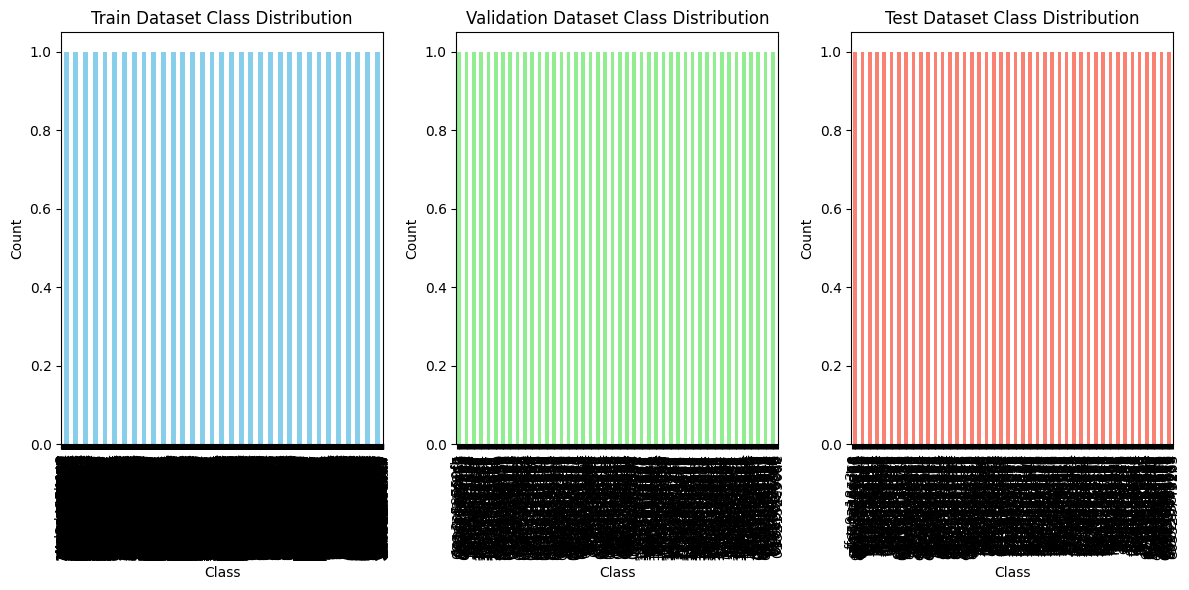


Checking for imbalance in Train Dataset:
Imbalance ratio: 0.03%
The dataset does not appear to be imbalanced.

Checking for imbalance in Val Dataset:
Imbalance ratio: 0.27%
The dataset does not appear to be imbalanced.

Checking for imbalance in Test Dataset:
Imbalance ratio: 0.27%
The dataset does not appear to be imbalanced.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the datasets
train_df = pd.read_csv('/content/aptos_data/train_1.csv')
val_df = pd.read_csv('/content/aptos_data/valid.csv')
test_df = pd.read_csv('/content/aptos_data/test.csv')

# Print the columns for reference
print("Train Columns:", train_df.columns)
print("Val Columns:", val_df.columns)
print("Test Columns:", test_df.columns)

# Analyze class distribution in each dataset
print("\nClass distribution in Train Dataset:")
train_class_counts = train_df['id_code'].value_counts()
print(train_class_counts)

print("\nClass distribution in Val Dataset:")
val_class_counts = val_df['id_code'].value_counts()
print(val_class_counts)

# Assuming 'patient_id' is also used in test.csv
print("\nClass distribution in Test Dataset:")
test_class_counts = test_df['id_code'].value_counts()
print(test_class_counts)

# Visualizing the class distribution
plt.figure(figsize=(12, 6))

# Plotting for Train dataset
plt.subplot(1, 3, 1)
train_class_counts.plot(kind='bar', color='skyblue')
plt.title('Train Dataset Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

# Plotting for Val dataset
plt.subplot(1, 3, 2)
val_class_counts.plot(kind='bar', color='lightgreen')
plt.title('Validation Dataset Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

# Plotting for Test dataset
plt.subplot(1, 3, 3)
test_class_counts.plot(kind='bar', color='salmon')
plt.title('Test Dataset Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Checking if there is an imbalance
def check_imbalance(class_counts, threshold=0.8):
    # Total samples and max class count
    total_samples = class_counts.sum()
    max_class_count = class_counts.max()

    # Imbalance ratio between the most frequent class and total samples
    imbalance_ratio = max_class_count / total_samples

    print(f"Imbalance ratio: {imbalance_ratio * 100:.2f}%")

    if imbalance_ratio > threshold:
        print(f"WARNING: Imbalance detected! The most frequent class accounts for {imbalance_ratio * 100:.2f}% of the dataset.")
    else:
        print("The dataset does not appear to be imbalanced.")

# Check imbalance in each dataset
print("\nChecking for imbalance in Train Dataset:")
check_imbalance(train_class_counts)

print("\nChecking for imbalance in Val Dataset:")
check_imbalance(val_class_counts)

print("\nChecking for imbalance in Test Dataset:")
check_imbalance(test_class_counts)


In [32]:
import torch.optim as optim
from collections import defaultdict
from torchvision.models import resnet18, ResNet18_Weights

# Custom Dataset for oversampling at the patient level
class CustomImageDataset(Dataset):
    def __init__(self, root_dir, label_file, transform=None, oversample=False):
        self.root_dir = root_dir
        self.transform = transform
        self.oversample = oversample
        self.image_paths = []
        self.labels = []
        self.patient_data = defaultdict(list)

        # Load the labels from the CSV file
        self.label_df = pd.read_csv(label_file)

        for _, row in self.label_df.iterrows():
            image_filename = row['id_code'] + '.png'
            label = row['diagnosis']

            image_path = os.path.join(root_dir, image_filename)
            self.image_paths.append(image_path)
            self.labels.append(label)
            patient_id = row['id_code']
            self.patient_data[patient_id].append(image_path)

        # Oversample patient data if required
        if self.oversample:
            self.image_paths = []
            self.labels = []
            for patient_id, images in self.patient_data.items():
                self.image_paths.extend(images)
                self.labels.extend([self.label_df[self.label_df['id_code'] == patient_id]['diagnosis'].values[0]] * len(images))

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert("RGB")
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

transform_train = transforms.Compose([
    transforms.Resize((224, 224)),  # Resizing images
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalization
])

transform_test = transforms.Compose([
    transforms.Resize((224, 224)),  # Resizing images
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalization
])

# Load pre-trained ResNet model without fully connected layers
resnet = models.resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)
modules = list(resnet.children())[:-1]  # Remove the fully connected (fc) layer
resnet = nn.Sequential(*modules)

# Custom FC Layer for the model
class CustomModel(nn.Module):
    def __init__(self):
        super(CustomModel, self).__init__()
        self.resnet = resnet
        self.fc1 = nn.Linear(512, 256)  # First fully connected layer
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(256, 128)  # Second fully connected layer
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(128, 5)  # Output layer (APTOS dataset has 5 classes)

    def forward(self, x):
        x = self.resnet(x)  # Extract features using ResNet
        x = x.view(x.size(0), -1)  # Flatten the output of ResNet
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.fc3(x)  # Final output
        return x

train_csv = '/content/aptos_data/train_1.csv'
val_csv = '/content/aptos_data/valid.csv'
test_csv = '/content/aptos_data/test.csv'

train_dataset = CustomImageDataset(root_dir='/content/aptos_data/train_images/train_images',
                                   label_file=train_csv,
                                   transform=transform_train, oversample=True)

val_dataset = CustomImageDataset(root_dir='/content/aptos_data/val_images/val_images',
                                 label_file=val_csv,
                                 transform=transform_test)

test_dataset = CustomImageDataset(root_dir='/content/aptos_data/test_images/test_images',
                                  label_file=test_csv,
                                  transform=transform_test)

# Create DataLoader for training, validation, and testing
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

# Initialize the model, loss function, and optimizer
model = CustomModel().cuda()
criterion = nn.CrossEntropyLoss()  # For classification tasks
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 8
learning_rate = 0.001
best_val_kappa = 0.0
early_stop_counter = 0
patience = 5

for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    correct_preds = 0
    total_preds = 0
    all_labels = []
    all_preds = []

    # Training Loop with Progress Bar
    with tqdm(train_loader, unit='batch', desc=f"Epoch {epoch+1}/{num_epochs}", ncols=100) as pbar:
        for inputs, labels in pbar:
            inputs, labels = inputs.cuda(), labels.cuda()

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # Calculate accuracy and collect metrics
            _, preds = torch.max(outputs, 1)
            correct_preds += torch.sum(preds == labels).item()
            total_preds += labels.size(0)

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())

            # Update the progress bar description with the current loss
            pbar.set_postfix(loss=loss.item(), lr=optimizer.param_groups[0]['lr'])

            running_loss += loss.item()

    # Calculate Training Metrics
    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = correct_preds / total_preds
    train_kappa = cohen_kappa_score(all_labels, all_preds)
    train_precision = precision_score(all_labels, all_preds, average='macro', zero_division=0)
    train_recall = recall_score(all_labels, all_preds, average='macro')

    print(f"[Train] Kappa: {train_kappa:.4f} Accuracy: {epoch_accuracy:.4f} Precision: {train_precision:.4f} Recall: {train_recall:.4f} Loss: {epoch_loss:.4f}")

    # Validation Loop with Progress Bar
    model.eval()
    correct_preds = 0
    total_preds = 0
    all_labels = []
    all_preds = []

    with torch.no_grad():
        with tqdm(val_loader, unit='batch', desc="Evaluating", ncols=100) as pbar:
            for inputs, labels in pbar:
                inputs, labels = inputs.cuda(), labels.cuda()

                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)

                correct_preds += torch.sum(preds == labels).item()
                total_preds += labels.size(0)

                all_labels.extend(labels.cpu().numpy())
                all_preds.extend(preds.cpu().numpy())

        val_accuracy = correct_preds / total_preds
        val_kappa = cohen_kappa_score(all_labels, all_preds)
        val_precision = precision_score(all_labels, all_preds, average='macro', zero_division=0)
        val_recall = recall_score(all_labels, all_preds, average='macro')

        print(f"[Val] Kappa: {val_kappa:.4f} Accuracy: {val_accuracy:.4f} Precision: {val_precision:.4f} Recall: {val_recall:.4f}")

        # Save the model if it improves validation Kappa score
        if val_kappa > best_val_kappa:
            best_val_kappa = val_kappa
            torch.save(model.state_dict(), '/content/fine_tuned_model.pth')  # Save the best model
            print(f"Model saved with Best Kappa: {best_val_kappa:.4f}, Epoch {epoch+1}")
            early_stop_counter = 0  # Reset early stopping counter
        else:
            early_stop_counter += 1

        # Implement early stopping
        if early_stop_counter >= patience:
            print(f"Early stopping triggered after {epoch+1} epochs.")
            break  # Stop training if no improvement for 'patience' epochs


model.eval()
correct_preds = 0
total_preds = 0
all_labels = []
all_preds = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.cuda(), labels.cuda()

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)

        correct_preds += torch.sum(preds == labels).item()
        total_preds += labels.size(0)

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())

test_accuracy = correct_preds / total_preds
test_kappa = cohen_kappa_score(all_labels, all_preds)
print(f"[Test] Accuracy: {test_accuracy:.4f}, Kappa: {test_kappa:.4f}")

# Save the fine-tuned model for Stage 2
torch.save(model.state_dict(), '/content/fine_tuned_model_b.pth')
print("Model saved after Stage 2 fine-tuning.")


# Testing and Save to CSV
model.eval()

test_image_ids = []
test_predictions = []

# Predict on the test set
with torch.no_grad():
    with tqdm(test_loader, unit='batch', desc="Predicting on Test Set", ncols=100) as pbar:
        for batch_idx, (inputs, labels) in enumerate(pbar):
            inputs = inputs.cuda()  # Move to GPU
            outputs = model(inputs)  # Get model predictions

            # Get predicted class (highest probability)
            _, preds = torch.max(outputs, 1)

            # Collect image ids and predictions
            batch_image_paths = test_loader.dataset.image_paths[batch_idx * test_loader.batch_size:(batch_idx + 1) * test_loader.batch_size]
            for i in range(len(preds)):
                image_id = batch_image_paths[i].split('/')[-1].split('.')[0]  # Extract image id from path
                test_image_ids.append(image_id)
                test_predictions.append(preds[i].item())  # Store the predicted class

# Create a DataFrame to store the predictions with image IDs
test_results = pd.DataFrame({
    'ID': test_image_ids,
    'Target': test_predictions
})

# Save to CSV file
test_results.to_csv('/content/test_prediction_b.csv', index=False)
print(f"Saving the test predictions to 'test_prediction_b.csv'")



Epoch 1/8: 100%|███████████████████████████| 92/92 [05:43<00:00,  3.73s/batch, loss=0.983, lr=0.001]


[Train] Kappa: 0.4862 Accuracy: 0.6840 Precision: 0.3259 Recall: 0.3611 Loss: 0.9017


Evaluating: 100%|████████████████████████████████████████████████| 12/12 [00:46<00:00,  3.84s/batch]


[Val] Kappa: 0.5467 Accuracy: 0.7186 Precision: 0.4174 Recall: 0.3819
Model saved with Best Kappa: 0.5467, Epoch 1


Epoch 2/8: 100%|███████████████████████████| 92/92 [05:43<00:00,  3.73s/batch, loss=0.714, lr=0.001]


[Train] Kappa: 0.5771 Accuracy: 0.7365 Precision: 0.4157 Recall: 0.4077 Loss: 0.7291


Evaluating: 100%|████████████████████████████████████████████████| 12/12 [00:46<00:00,  3.87s/batch]


[Val] Kappa: 0.6356 Accuracy: 0.7650 Precision: 0.4335 Recall: 0.4707
Model saved with Best Kappa: 0.6356, Epoch 2


Epoch 3/8: 100%|███████████████████████████| 92/92 [05:42<00:00,  3.73s/batch, loss=0.793, lr=0.001]


[Train] Kappa: 0.5977 Accuracy: 0.7481 Precision: 0.5026 Recall: 0.4294 Loss: 0.6707


Evaluating: 100%|████████████████████████████████████████████████| 12/12 [00:46<00:00,  3.84s/batch]


[Val] Kappa: 0.6203 Accuracy: 0.7432 Precision: 0.5028 Recall: 0.5479


Epoch 4/8: 100%|███████████████████████████| 92/92 [05:42<00:00,  3.72s/batch, loss=0.756, lr=0.001]


[Train] Kappa: 0.6053 Accuracy: 0.7498 Precision: 0.5103 Recall: 0.4532 Loss: 0.6473


Evaluating: 100%|████████████████████████████████████████████████| 12/12 [00:46<00:00,  3.84s/batch]


[Val] Kappa: 0.6575 Accuracy: 0.7787 Precision: 0.6352 Recall: 0.5085
Model saved with Best Kappa: 0.6575, Epoch 4


Epoch 5/8: 100%|███████████████████████████| 92/92 [05:42<00:00,  3.72s/batch, loss=0.993, lr=0.001]


[Train] Kappa: 0.6454 Accuracy: 0.7741 Precision: 0.5679 Recall: 0.4876 Loss: 0.6053


Evaluating: 100%|████████████████████████████████████████████████| 12/12 [00:46<00:00,  3.83s/batch]


[Val] Kappa: 0.6126 Accuracy: 0.7541 Precision: 0.4696 Recall: 0.4756


Epoch 6/8: 100%|███████████████████████████| 92/92 [05:41<00:00,  3.72s/batch, loss=0.278, lr=0.001]


[Train] Kappa: 0.6425 Accuracy: 0.7717 Precision: 0.5643 Recall: 0.4879 Loss: 0.6006


Evaluating: 100%|████████████████████████████████████████████████| 12/12 [00:46<00:00,  3.84s/batch]


[Val] Kappa: 0.6603 Accuracy: 0.7787 Precision: 0.5045 Recall: 0.5006
Model saved with Best Kappa: 0.6603, Epoch 6


Epoch 7/8: 100%|███████████████████████████| 92/92 [05:41<00:00,  3.72s/batch, loss=0.545, lr=0.001]


[Train] Kappa: 0.6776 Accuracy: 0.7925 Precision: 0.6161 Recall: 0.5367 Loss: 0.5608


Evaluating: 100%|████████████████████████████████████████████████| 12/12 [00:46<00:00,  3.84s/batch]


[Val] Kappa: 0.6630 Accuracy: 0.7787 Precision: 0.5576 Recall: 0.5323
Model saved with Best Kappa: 0.6630, Epoch 7


Epoch 8/8: 100%|███████████████████████████| 92/92 [05:41<00:00,  3.72s/batch, loss=0.742, lr=0.001]


[Train] Kappa: 0.6813 Accuracy: 0.7942 Precision: 0.5958 Recall: 0.5369 Loss: 0.5231


Evaluating: 100%|████████████████████████████████████████████████| 12/12 [00:46<00:00,  3.85s/batch]


[Val] Kappa: 0.6506 Accuracy: 0.7760 Precision: 0.7240 Recall: 0.4921
[Test] Accuracy: 0.8005, Kappa: 0.6671
Model saved after Stage 2 fine-tuning.


Predicting on Test Set: 100%|████████████████████████████████████| 12/12 [00:40<00:00,  3.39s/batch]

Saving the test predictions to 'test_prediction_b.csv'


# Step C Incorporate attention mechanisms in the model. (10 points)

In [33]:
# Custom Dataset
class CustomImageDataset(Dataset):
    def __init__(self, root_dir, label_file, transform=None, oversample=False):
        self.root_dir = root_dir
        self.transform = transform
        self.oversample = oversample
        self.image_paths = []
        self.labels = []
        self.patient_data = defaultdict(list)

        # Load the labels from the CSV file
        self.label_df = pd.read_csv(label_file)

        for _, row in self.label_df.iterrows():
            image_filename = row['id_code'] + '.png'
            label = row['diagnosis']

            image_path = os.path.join(root_dir, image_filename)
            self.image_paths.append(image_path)
            self.labels.append(label)
            patient_id = row['id_code']
            self.patient_data[patient_id].append(image_path)

        if self.oversample:
            self.image_paths = []
            self.labels = []
            for patient_id, images in self.patient_data.items():
                self.image_paths.extend(images)
                self.labels.extend([self.label_df[self.label_df['id_code'] == patient_id]['diagnosis'].values[0]] * len(images))

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert("RGB")
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

transform_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

transform_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load pre-trained ResNet model without fully connected layers
resnet = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
modules = list(resnet.children())[:-1]  # Remove the fully connected (fc) layer
resnet = nn.Sequential(*modules)

# Channel Attention (Squeeze-and-Excitation) Block
class SEBlock(nn.Module):
    def __init__(self, channels, reduction=16):
        super(SEBlock, self).__init__()
        self.fc1 = nn.Linear(channels, channels // reduction)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(channels // reduction, channels)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        batch_size, channels, _, _ = x.size()
        # Squeeze: Global Average Pooling
        x_se = x.mean(dim=[2, 3], keepdim=True)
        x_se = x_se.view(batch_size, channels)
        # Excitation: Fully connected layers
        x_se = self.fc1(x_se)
        x_se = self.relu(x_se)
        x_se = self.fc2(x_se)
        x_se = self.sigmoid(x_se).view(batch_size, channels, 1, 1)
        # Recalibrate: Apply attention to each channel
        return x * x_se

# Spatial Attention Layer
class SpatialAttentionLayer(nn.Module):
    def __init__(self, in_channels):
        super(SpatialAttentionLayer, self).__init__()
        self.conv = nn.Conv2d(in_channels, 1, kernel_size=7, padding=3, stride=1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Apply convolution to generate spatial attention map
        attn_map = self.conv(x)
        attn_map = self.sigmoid(attn_map)  # Generate attention map (1 channel)
        # Apply the spatial attention to the input feature map
        return x * attn_map

# Custom Model with both Channel and Spatial Attention
class CustomModelWithAttention(nn.Module):
    def __init__(self):
        super(CustomModelWithAttention, self).__init__()
        self.resnet = resnet
        self.se_block = SEBlock(512)  # Channel attention (SE block)
        self.spatial_attention = SpatialAttentionLayer(512)  # Spatial attention
        self.fc1 = nn.Linear(512, 256)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(256, 128)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(128, 5)  # Output layer (5 classes for classification)

    def forward(self, x):
        x = self.resnet(x)  # Extract features using ResNet
        # ResNet output shape: (batch_size, 512, 1, 1)

        # Apply Channel Attention
        x = self.se_block(x)
        # Apply Spatial Attention
        x = self.spatial_attention(x)

        x = x.view(x.size(0), -1)  # Flatten after attention
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.fc3(x)  # Final output
        return x

train_csv = '/content/aptos_data/train_1.csv'
val_csv = '/content/aptos_data/valid.csv'
test_csv = '/content/aptos_data/test.csv'

train_dataset = CustomImageDataset(root_dir='/content/aptos_data/train_images/train_images',
                                   label_file=train_csv,
                                   transform=transform_train, oversample=True)

val_dataset = CustomImageDataset(root_dir='/content/aptos_data/val_images/val_images',
                                 label_file=val_csv,
                                 transform=transform_test)

test_dataset = CustomImageDataset(root_dir='/content/aptos_data/test_images/test_images',
                                  label_file=test_csv,
                                  transform=transform_test)

# DataLoader for training, validation, and testing
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Initialize model, loss function, and optimizer
model = CustomModelWithAttention().cuda()  # Model with attention
criterion = nn.CrossEntropyLoss()  # For classification tasks
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 6
best_val_kappa = 0.0  # Best validation Kappa score
early_stop_counter = 0
patience = 5  # Number of epochs to wait for improvement before early stopping

for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    correct_preds = 0
    total_preds = 0
    all_labels = []
    all_preds = []

    # Training Loop
    with tqdm(train_loader, unit='batch', desc=f"Epoch {epoch+1}/{num_epochs}", ncols=100) as pbar:
        for inputs, labels in pbar:
            inputs, labels = inputs.cuda(), labels.cuda()

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # Calculate accuracy and collect metrics
            _, preds = torch.max(outputs, 1)
            correct_preds += torch.sum(preds == labels).item()
            total_preds += labels.size(0)

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())

            # Update progress bar
            pbar.set_postfix(loss=loss.item(), lr=optimizer.param_groups[0]['lr'])

            running_loss += loss.item()

    # Calculate Training Metrics
    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = correct_preds / total_preds
    train_kappa = cohen_kappa_score(all_labels, all_preds)
    train_precision = precision_score(all_labels, all_preds, average='macro', zero_division=0)
    train_recall = recall_score(all_labels, all_preds, average='macro')

    print(f"[Train] Kappa: {train_kappa:.4f} Accuracy: {epoch_accuracy:.4f} Precision: {train_precision:.4f} Recall: {train_recall:.4f} Loss: {epoch_loss:.4f}")

    # Validation Loop
    model.eval()  # Set model to evaluation mode
    correct_preds = 0
    total_preds = 0
    all_labels = []
    all_preds = []

    with torch.no_grad():
        with tqdm(val_loader, unit='batch', desc="Evaluating", ncols=100) as pbar:
            for inputs, labels in pbar:
                inputs, labels = inputs.cuda(), labels.cuda()  # Move data to GPU

                outputs = model(inputs)  # Forward pass
                _, preds = torch.max(outputs, 1)  # Get predicted class

                correct_preds += torch.sum(preds == labels).item()
                total_preds += labels.size(0)

                all_labels.extend(labels.cpu().numpy())
                all_preds.extend(preds.cpu().numpy())

        val_accuracy = correct_preds / total_preds
        val_kappa = cohen_kappa_score(all_labels, all_preds)
        val_precision = precision_score(all_labels, all_preds, average='macro', zero_division=0)
        val_recall = recall_score(all_labels, all_preds, average='macro')

        print(f"[Val] Kappa: {val_kappa:.4f} Accuracy: {val_accuracy:.4f} Precision: {val_precision:.4f} Recall: {val_recall:.4f}")

        # Save the best model based on validation Kappa score
        if val_kappa > best_val_kappa:
            best_val_kappa = val_kappa
            torch.save(model.state_dict(), '/content/fine_tuned_model_with_attention.pth')
            print(f"Model saved with Best Kappa: {best_val_kappa:.4f}, Epoch {epoch+1}")
            early_stop_counter = 0
        else:
            early_stop_counter += 1

        # Early stopping
        if early_stop_counter >= patience:
            print(f"Early stopping triggered after {epoch+1} epochs.")
            break

# Testing and Save to CSV
model.eval()

test_image_ids = []
test_predictions = []

# Predict on the test set
with torch.no_grad():
    with tqdm(test_loader, unit='batch', desc="Predicting on Test Set", ncols=100) as pbar:
        for batch_idx, (inputs, labels) in enumerate(pbar):
            inputs = inputs.cuda()  # Move to GPU
            outputs = model(inputs)  # Get model predictions

            # Get predicted class (highest probability)
            _, preds = torch.max(outputs, 1)

            # Collect image ids and predictions
            batch_image_paths = test_loader.dataset.image_paths[batch_idx * test_loader.batch_size:(batch_idx + 1) * test_loader.batch_size]
            for i in range(len(preds)):
                image_id = batch_image_paths[i].split('/')[-1].split('.')[0]  # Extract image id from path
                test_image_ids.append(image_id)
                test_predictions.append(preds[i].item())  # Store the predicted class

# Create a DataFrame to store the predictions with image IDs
test_results = pd.DataFrame({
    'ID': test_image_ids,
    'Target': test_predictions
})

# Save to CSV file
test_results.to_csv('/content/test_prediction_c.csv', index=False)
print(f"Saving the test predictions to 'test_prediction_c.csv'")




Epoch 1/8: 100%|█████████████████████████████| 92/92 [05:41<00:00,  3.72s/batch, loss=1.1, lr=0.001]


[Train] Kappa: 0.4494 Accuracy: 0.6662 Precision: 0.3002 Recall: 0.3436 Loss: 0.9681


Evaluating: 100%|████████████████████████████████████████████████| 12/12 [00:46<00:00,  3.84s/batch]


[Val] Kappa: 0.5439 Accuracy: 0.7131 Precision: 0.2910 Recall: 0.3788
Model saved with Best Kappa: 0.5439, Epoch 1


Epoch 2/8: 100%|████████████████████████████| 92/92 [05:42<00:00,  3.72s/batch, loss=0.55, lr=0.001]


[Train] Kappa: 0.5646 Accuracy: 0.7324 Precision: 0.3409 Recall: 0.3822 Loss: 0.7560


Evaluating: 100%|████████████████████████████████████████████████| 12/12 [00:46<00:00,  3.84s/batch]


[Val] Kappa: 0.5756 Accuracy: 0.7350 Precision: 0.4944 Recall: 0.3911
Model saved with Best Kappa: 0.5756, Epoch 2


Epoch 3/8: 100%|███████████████████████████| 92/92 [05:42<00:00,  3.72s/batch, loss=0.365, lr=0.001]


[Train] Kappa: 0.6012 Accuracy: 0.7519 Precision: 0.3985 Recall: 0.4211 Loss: 0.6849


Evaluating: 100%|████████████████████████████████████████████████| 12/12 [00:46<00:00,  3.84s/batch]


[Val] Kappa: 0.5177 Accuracy: 0.6694 Precision: 0.3753 Recall: 0.4501


Epoch 4/8: 100%|███████████████████████████| 92/92 [05:42<00:00,  3.72s/batch, loss=0.596, lr=0.001]


[Train] Kappa: 0.6195 Accuracy: 0.7611 Precision: 0.4124 Recall: 0.4415 Loss: 0.6462


Evaluating: 100%|████████████████████████████████████████████████| 12/12 [00:46<00:00,  3.84s/batch]


[Val] Kappa: 0.6356 Accuracy: 0.7650 Precision: 0.4299 Recall: 0.4707
Model saved with Best Kappa: 0.6356, Epoch 4


Epoch 5/8: 100%|███████████████████████████| 92/92 [05:41<00:00,  3.72s/batch, loss=0.359, lr=0.001]


[Train] Kappa: 0.6279 Accuracy: 0.7655 Precision: 0.4848 Recall: 0.4510 Loss: 0.6213


Evaluating: 100%|████████████████████████████████████████████████| 12/12 [00:46<00:00,  3.84s/batch]


[Val] Kappa: 0.6595 Accuracy: 0.7814 Precision: 0.4573 Recall: 0.4861
Model saved with Best Kappa: 0.6595, Epoch 5


Epoch 6/8: 100%|███████████████████████████| 92/92 [05:42<00:00,  3.72s/batch, loss=0.289, lr=0.001]


[Train] Kappa: 0.6400 Accuracy: 0.7727 Precision: 0.5253 Recall: 0.4658 Loss: 0.5972


Evaluating: 100%|████████████████████████████████████████████████| 12/12 [00:46<00:00,  3.84s/batch]


[Val] Kappa: 0.6279 Accuracy: 0.7623 Precision: 0.4276 Recall: 0.4604


Epoch 7/8: 100%|████████████████████████████| 92/92 [05:42<00:00,  3.72s/batch, loss=1.22, lr=0.001]


[Train] Kappa: 0.6441 Accuracy: 0.7744 Precision: 0.5185 Recall: 0.4746 Loss: 0.5737


Evaluating: 100%|████████████████████████████████████████████████| 12/12 [00:46<00:00,  3.84s/batch]


[Val] Kappa: 0.6295 Accuracy: 0.7650 Precision: 0.4445 Recall: 0.4431


Epoch 8/8: 100%|███████████████████████████| 92/92 [05:41<00:00,  3.72s/batch, loss=0.535, lr=0.001]


[Train] Kappa: 0.6662 Accuracy: 0.7870 Precision: 0.5510 Recall: 0.5102 Loss: 0.5527


Evaluating: 100%|████████████████████████████████████████████████| 12/12 [00:46<00:00,  3.84s/batch]


[Val] Kappa: 0.6220 Accuracy: 0.7568 Precision: 0.4847 Recall: 0.4601


Predicting on Test Set: 100%|████████████████████████████████████| 12/12 [00:40<00:00,  3.39s/batch]

Saving the test predictions to 'test_prediction_c.csv'


# Step D Compare the performance of different models and strategies. (20 points)

In [34]:
import os
import numpy as np
import torch
import cv2
import torch.nn as nn
from torchvision import models, transforms
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import accuracy_score, cohen_kappa_score, classification_report
from PIL import Image, ImageFilter
from collections import defaultdict
from tqdm import tqdm  # Added for progress bar
import pandas as pd

# Custom Dataset Class
class CustomImageDataset(Dataset):
    def __init__(self, root_dir, label_file, transform=None, oversample=False):
        self.root_dir = root_dir
        self.label_file = label_file
        self.transform = transform
        self.oversample = oversample
        self.image_paths = []
        self.labels = []
        self.patient_data = defaultdict(list)

        print(f"Loading labels from {label_file}...")
        self.label_df = pd.read_csv(label_file)
        print(f"Label file loaded. {len(self.label_df)} rows found.")

        for _, row in self.label_df.iterrows():
            image_filename = row['id_code'] + '.png'
            label = row['diagnosis']
            image_path = os.path.join(root_dir, image_filename)

            if os.path.exists(image_path):  # Check if the image file exists
                self.image_paths.append(image_path)
                self.labels.append(label)
                patient_id = row['id_code']
                self.patient_data[patient_id].append(image_path)
            else:
                print(f"Warning: File {image_path} not found.")

        if self.oversample:
            print("Oversampling enabled. Rebuilding image paths...")
            self.image_paths = []
            self.labels = []
            for patient_id, images in self.patient_data.items():
                self.image_paths.extend(images)
                self.labels.extend([self.label_df[self.label_df['id_code'] == patient_id]['diagnosis'].values[0]] * len(images))

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert("RGB")
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label


# Image Preprocessing Functions
def apply_clahe(image):
    img = np.array(image)

    # Convert image to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # Apply CLAHE
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced_img = clahe.apply(gray_img)

    # Convert back to RGB
    enhanced_img_rgb = cv2.cvtColor(enhanced_img, cv2.COLOR_GRAY2RGB)

    return Image.fromarray(enhanced_img_rgb)


def apply_gaussian_blur(image):
    img = np.array(image)
    img = cv2.GaussianBlur(img, (5, 5), 0)
    return Image.fromarray(img)


def apply_sharpening(image):
    img = image.filter(ImageFilter.SHARPEN)
    return img


def apply_circle_crop(image):
    img = np.array(image)
    mask = np.zeros_like(img)
    rows, cols = img.shape[:2]
    center = (cols // 2, rows // 2)
    radius = min(cols, rows) // 2
    cv2.circle(mask, center, radius, (255, 255, 255), -1)
    img = cv2.bitwise_and(img, mask)
    return Image.fromarray(img)


def preprocess_data(dataloader, preprocess_type='clahe'):
    transform_list = [transforms.Resize((224, 224))]

    if preprocess_type == 'clahe':
        transform_list.append(transforms.Lambda(lambda img: apply_clahe(img)))
    elif preprocess_type == 'blur':
        transform_list.append(transforms.Lambda(lambda img: apply_gaussian_blur(img)))
    elif preprocess_type == 'sharpen':
        transform_list.append(transforms.Lambda(lambda img: apply_sharpening(img)))
    elif preprocess_type == 'crop':
        transform_list.append(transforms.Lambda(lambda img: apply_circle_crop(img)))

    transform_list.append(transforms.ToTensor())

    transform = transforms.Compose(transform_list)

    return DataLoader(
        CustomImageDataset(
            root_dir=dataloader.dataset.root_dir,
            label_file=dataloader.dataset.label_file,
            transform=transform,
            oversample=dataloader.dataset.oversample
        ),
        batch_size=dataloader.batch_size if hasattr(dataloader, 'batch_size') else 32,
        shuffle=getattr(dataloader, 'shuffle', True)
    )


class TransferModel(nn.Module):
    def __init__(self, model_type, num_classes=5, pretrained=True):
        super(TransferModel, self).__init__()

        if model_type == 'resnet18':
            model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1 if pretrained else None)
            model.fc = nn.Linear(model.fc.in_features, num_classes)

        elif model_type == 'vgg16':
            model = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1 if pretrained else None)
            model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)

        elif model_type == 'efficientnet':
            model = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.IMAGENET1K_V1 if pretrained else None)
            model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)

        else:
            raise ValueError(f"Model {model_type} not supported")

        self.model = model

    def forward(self, x):
        return self.model(x)


def max_voting_ensemble(models, dataloader):
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.cuda(), labels.cuda()
            all_labels.extend(labels.cpu().numpy())

            outputs = []
            for model in models:
                model.eval()
                outputs.append(torch.softmax(model(inputs), dim=1))  # Use softmax for probabilities

            avg_outputs = torch.stack(outputs).mean(dim=0)
            preds = torch.argmax(avg_outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())

    return np.array(all_preds), np.array(all_labels)


def evaluate_model(model, val_loader):
    model.eval()
    predictions, ground_truth = [], []
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.cuda(), labels.cuda()
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            predictions.extend(preds.cpu().numpy())
            ground_truth.extend(labels.cpu().numpy())

    print("Classification Report:")
    print(classification_report(ground_truth, predictions))

    kappa = cohen_kappa_score(ground_truth, predictions)
    print(f"Cohen's Kappa Score: {kappa:.4f}")
    return kappa


# Main Code
print("Preparing datasets and dataloaders...")
train_csv = '/content/aptos_data/train_1.csv'
val_csv = '/content/aptos_data/valid.csv'
transform_train = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor()])
transform_test = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor()])

train_dataset = CustomImageDataset(
    root_dir='/content/aptos_data/train_images/train_images',
    label_file=train_csv, transform=transform_train, oversample=True
)
val_dataset = CustomImageDataset(
    root_dir='/content/aptos_data/val_images/val_images', label_file=val_csv, transform=transform_test
)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

print("Initializing models...")
model_resnet = TransferModel('resnet18').cuda()
model_vgg = TransferModel('vgg16').cuda()
model_efficientnet = TransferModel('efficientnet').cuda()

print("Setting up training loop...")
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(
    list(model_resnet.parameters()) + list(model_vgg.parameters()) + list(model_efficientnet.parameters()),
    lr=0.001
)

for epoch in range(6):
    print(f"Epoch {epoch + 1}/6")
    model_resnet.train()
    model_vgg.train()
    model_efficientnet.train()

    pbar = tqdm(train_loader, desc=f"Epoch {epoch+1}", ncols=100, leave=False)
    for inputs, labels in pbar:
        inputs, labels = inputs.cuda(), labels.cuda()
        optimizer.zero_grad()

        outputs_resnet = model_resnet(inputs)
        outputs_vgg = model_vgg(inputs)
        outputs_efficientnet = model_efficientnet(inputs)

        loss = (criterion(outputs_resnet, labels) +
                criterion(outputs_vgg, labels) +
                criterion(outputs_efficientnet, labels))

        loss.backward()
        optimizer.step()
        pbar.set_postfix(loss=loss.item())

print("Evaluating models...")
for model in [model_resnet, model_vgg, model_efficientnet]:
    kappa = evaluate_model(model, val_loader)

train_loader_clahe = preprocess_data(train_loader, 'clahe')
val_loader_clahe = preprocess_data(val_loader, 'clahe')

print("Re-evaluating Max Voting Ensemble with CLAHE Preprocessing...")
max_voting_preds, ground_truth = max_voting_ensemble(
    [model_resnet, model_vgg, model_efficientnet], val_loader_clahe)

print("Max Voting Classification Report (CLAHE):")
print(classification_report(ground_truth, max_voting_preds))
kappa = cohen_kappa_score(ground_truth, max_voting_preds)
print(f"Max Voting Cohen's Kappa Score: {kappa:.4f}")

# Testing and Save to CSV
print("Testing and saving results to CSV...")
test_image_ids = []
test_predictions = []

# Predict on the test set
model = model_resnet  # Assuming ResNet for final prediction, can use ensemble instead.
test_loader = DataLoader(val_dataset, batch_size=32)  # Replace with actual test dataset

with torch.no_grad():
    with tqdm(test_loader, unit='batch', desc="Predicting on Test Set", ncols=100) as pbar:
        for batch_idx, (inputs, labels) in enumerate(pbar):
            inputs = inputs.cuda()  # Move to GPU
            outputs = model(inputs)  # Get model predictions

            # Get predicted class (highest probability)
            _, preds = torch.max(outputs, 1)

            # Collect image ids and predictions
            batch_image_paths = test_loader.dataset.image_paths[batch_idx * test_loader.batch_size:(batch_idx + 1) * test_loader.batch_size]
            for i in range(len(preds)):
                image_id = batch_image_paths[i].split('/')[-1].split('.')[0]  # Extract image id from path
                test_image_ids.append(image_id)
                test_predictions.append(preds[i].item())  # Store the predicted class

# Create a DataFrame to store the predictions with image IDs
test_results = pd.DataFrame({
    'ID': test_image_ids,
    'Target': test_predictions
})

# Save to CSV file
test_results.to_csv('/content/test_prediction_d.csv', index=False)
print(f"Test predictions saved to 'test_prediction_d.csv'")


Preparing datasets and dataloaders...
Loading labels from /content/aptos_data/train_1.csv...
Label file loaded. 2930 rows found.
Oversampling enabled. Rebuilding image paths...
Loading labels from /content/aptos_data/valid.csv...
Label file loaded. 366 rows found.
Initializing models...
Setting up training loop...
Epoch 1/6


Epoch 2/6


Epoch 3/6


Epoch 4/6


Epoch 5/6


Epoch 6/6


Evaluating models...
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       172
           1       0.68      0.62      0.65        40
           2       0.72      0.81      0.76       104
           3       0.33      0.05      0.08        22
           4       0.62      0.54      0.58        28

    accuracy                           0.81       366
   macro avg       0.66      0.60      0.60       366
weighted avg       0.78      0.81      0.79       366

Cohen's Kappa Score: 0.7080
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       172
           1       0.00      0.00      0.00        40
           2       0.50      0.92      0.65       104
           3       0.00      0.00      0.00        22
           4       0.00      0.00      0.00        28

    accuracy                           0.71       366
   macro avg       0.29      0.38   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       172
           1       0.71      0.68      0.69        40
           2       0.72      0.82      0.77       104
           3       0.60      0.14      0.22        22
           4       0.52      0.57      0.54        28

    accuracy                           0.83       366
   macro avg       0.71      0.64      0.64       366
weighted avg       0.82      0.83      0.81       366

Cohen's Kappa Score: 0.7376
Loading labels from /content/aptos_data/train_1.csv...
Label file loaded. 2930 rows found.
Oversampling enabled. Rebuilding image paths...
Loading labels from /content/aptos_data/valid.csv...
Label file loaded. 366 rows found.
Re-evaluating Max Voting Ensemble with CLAHE Preprocessing...
Max Voting Classification Report (CLAHE):
              precision    recall  f1-score   support

           0       0.71      1.00      0.83       172
           1       1

Predicting on Test Set: 100%|████████████████████████████████████| 12/12 [00:46<00:00,  3.84s/batch]

Test predictions saved to 'test_prediction_d.csv'


# Step E Creating Visualizations and Explainable AI. (5 points)

In [ ]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import models, transforms
import matplotlib.pyplot as plt
import cv2
from collections import defaultdict
from sklearn.metrics import accuracy_score
from PIL import Image
from tqdm import tqdm
import pandas as pd


class CustomImageDataset(Dataset):
    def __init__(self, root_dir, label_file, transform=None, oversample=False):
        self.root_dir = root_dir
        self.transform = transform
        self.oversample = oversample
        self.image_paths = []
        self.labels = []
        self.patient_data = defaultdict(list)

        self.label_df = pd.read_csv(label_file)
        for _, row in self.label_df.iterrows():
            image_filename = row['id_code'] + '.png'
            label = row['diagnosis']

            image_path = os.path.join(root_dir, image_filename)
            self.image_paths.append(image_path)
            self.labels.append(label)
            patient_id = row['id_code']
            self.patient_data[patient_id].append(image_path)

        if self.oversample:
            self.image_paths = []
            self.labels = []
            for patient_id, images in self.patient_data.items():
                self.image_paths.extend(images)
                self.labels.extend([self.label_df[self.label_df['id_code'] == patient_id]['diagnosis'].values[0]] * len(images))

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert("RGB")  # Ensure image is PIL.Image
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label


class TransferModel(nn.Module):
    def __init__(self, model_type, num_classes=5, pretrained=True):
        super(TransferModel, self).__init__()

        if model_type == 'resnet18':
            model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1 if pretrained else None)
            model.fc = nn.Linear(model.fc.in_features, num_classes)

        elif model_type == 'vgg16':
            model = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1 if pretrained else None)
            model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)

        elif model_type == 'efficientnet':
            model = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.IMAGENET1K_V1 if pretrained else None)
            model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)

        else:
            raise ValueError(f"Model {model_type} not supported")

        self.model = model

    def forward(self, x):
        return self.model(x)


def plot_loss_accuracy(train_losses, val_losses, train_accuracies, val_accuracies, epochs=10):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(range(1, epochs + 1), train_losses, label='Train Loss')
    plt.plot(range(1, epochs + 1), val_losses, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(1, epochs + 1), train_accuracies, label='Train Accuracy')
    plt.plot(range(1, epochs + 1), val_accuracies, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()


def main():
    train_csv = '/content/aptos_data/train_1.csv'
    val_csv = '/content/aptos_data/valid.csv'

    transform_train = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
    ])
    transform_test = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
    ])

    train_dataset = CustomImageDataset(root_dir='/content/aptos_data/train_images/train_images', label_file=train_csv, transform=transform_train)
    val_dataset = CustomImageDataset(root_dir='/content/aptos_data/val_images/val_images', label_file=val_csv, transform=transform_test)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

    model = TransferModel('resnet18').cuda()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(10):
        print(f"Epoch {epoch + 1}/10")
        model.train()
        epoch_train_loss = 0
        correct_train = 0
        total_train = 0

        for inputs, labels in tqdm(train_loader, desc="Training Progress", leave=False):
            inputs, labels = inputs.cuda(), labels.cuda()
            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            epoch_train_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct_train += (preds == labels).sum().item()
            total_train += labels.size(0)

        train_losses.append(epoch_train_loss / len(train_loader))
        train_accuracies.append(correct_train / total_train)

        model.eval()
        epoch_val_loss = 0
        correct_val = 0
        total_val = 0

        with torch.no_grad():
            for inputs, labels in tqdm(val_loader, desc="Validation Progress", leave=False):
                inputs, labels = inputs.cuda(), labels.cuda()
                outputs = model(inputs)

                loss = criterion(outputs, labels)
                epoch_val_loss += loss.item()

                _, preds = torch.max(outputs, 1)
                correct_val += (preds == labels).sum().item()
                total_val += labels.size(0)

        val_losses.append(epoch_val_loss / len(val_loader))
        val_accuracies.append(correct_val / total_val)

    plot_loss_accuracy(train_losses, val_losses, train_accuracies, val_accuracies)

    # Example Grad-CAM visualization
    image, label = val_dataset[0]  # Pick the first image in the validation dataset
    image = image.unsqueeze(0).cuda()  # Add batch dimension
    print(f"Image shape for Grad-CAM: {image.shape}")
    plt.imshow(image.cpu().squeeze().permute(1, 2, 0))
    plt.show()


if __name__ == "__main__":
    main()


Epoch 1/10


Epoch 2/10


Epoch 3/10


Epoch 4/10


Epoch 5/10


Epoch 6/10


Epoch 7/10


Epoch 8/10


Epoch 9/10


Epoch 10/10


Training Progress:  89%|████████▉ | 82/92 [05:05<00:41,  4.18s/it]